In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('ggplot')

In [2]:
data = pd.read_csv("T1.csv")
print(data.shape)
data.head()

(50530, 5)


,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [3]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286


In [4]:
data['Month'] = data['Date/Time'].dt.month
data['Day'] = data['Date/Time'].dt.day 
data['Hour'] = data['Date/Time'].dt.hour 
data['Minute'] = data['Date/Time'].dt.minute
data['Wind']= round(data['Wind Speed (m/s)'])
data['WindDir']=round(data['Wind Direction (°)'])
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Month,Day,Hour,Minute,Wind,WindDir
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,1,1,0,0,5.0,260.0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,1,1,0,10,6.0,269.0
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,1,1,0,20,5.0,273.0
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,1,1,0,30,6.0,271.0
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,1,1,0,40,6.0,266.0


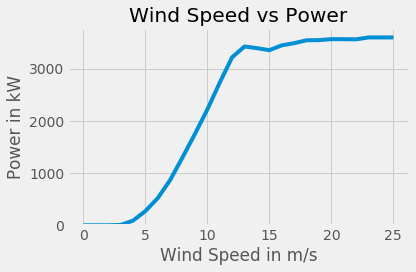

In [5]:
#plt.figure(figsize = (15,7))
plt.style.use('fivethirtyeight')
data.groupby('Wind')['LV ActivePower (kW)'].mean().plot(label = 'Active')
#data.groupby('Wind')['Theoretical_Power_Curve (KWh)'].mean().plot(label = 'Theoretical')
plt.ylim(0)
plt.xlabel("Wind Speed in m/s")
#plt.legend()
plt.ylabel("Power in kW")
plt.title("Wind Speed vs Power")
plt.tight_layout()
plt.savefig('WebApp/flask/static/images/windvspower.png')
plt.show()

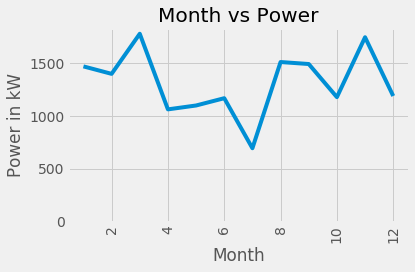

In [38]:
data.groupby('Month')['LV ActivePower (kW)'].mean().plot(grid = True)
#data.groupby('Month')['Theoretical_Power_Curve (KWh)'].mean().plot(label = 'Theoretical')
plt.ylim(0)
plt.xticks(rotation = 90)
plt.ylabel("Power in kW")
plt.title("Month vs Power")
plt.tight_layout()
plt.savefig('WebApp/flask/static/images/monthvspower.png')
plt.show()

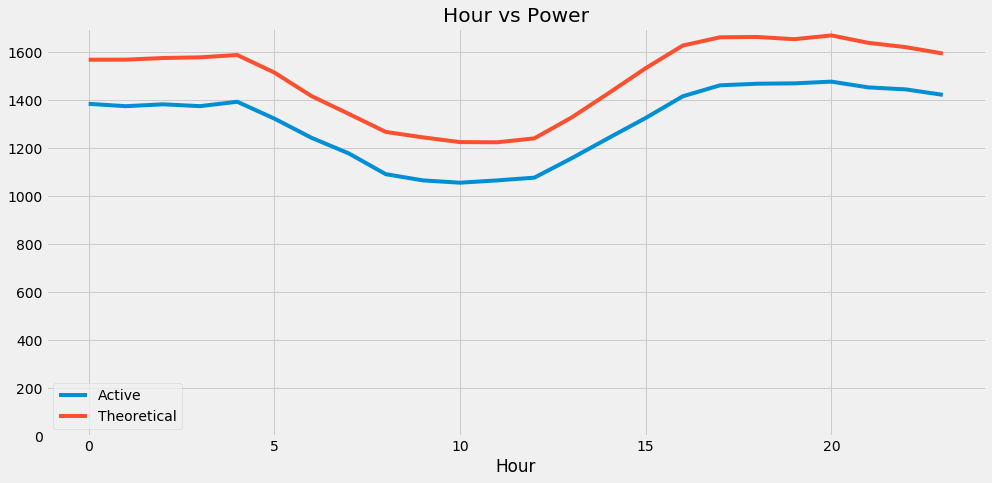

In [23]:
plt.figure(figsize = (15,7))
data.groupby('Hour')['LV ActivePower (kW)'].mean().plot(label = 'Active')
data.groupby('Hour')['Theoretical_Power_Curve (KWh)'].mean().plot(label = 'Theoretical')
plt.ylim(0)
plt.legend()
plt.title("Hour vs Power")
plt.show()

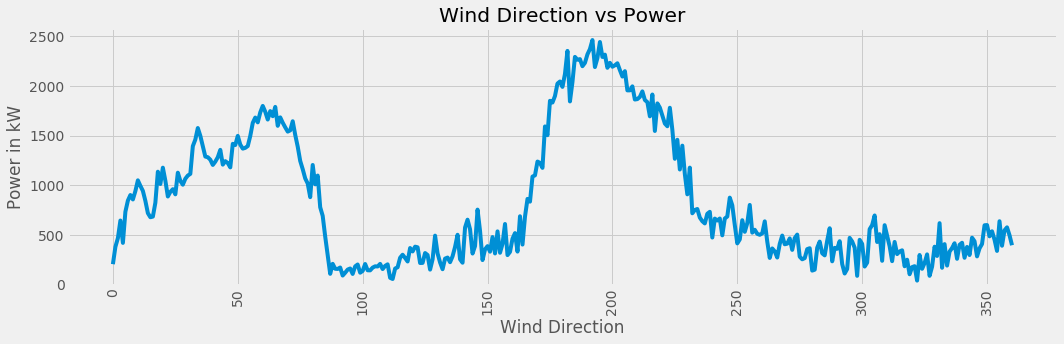

In [39]:
plt.figure(figsize = (15,5))
data.groupby('WindDir')['LV ActivePower (kW)'].mean().plot(label = 'Active')
#data.groupby('WindDir')['Theoretical_Power_Curve (KWh)'].mean().plot(label = 'Theoretical')
plt.ylim(0)
plt.ylabel("Power in kW")
plt.xlabel("Wind Direction")
plt.xticks(rotation = 90)
plt.title("Wind Direction vs Power")
plt.tight_layout()
plt.savefig('WebApp/flask/static/images/wind_dirvspower.png')
plt.show()